In [25]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Reading the dataset
housing = pd.read_csv("C:\\Users\\Priyanshu Gupta\\OneDrive\\Desktop\\Coding\\python\\Internship_Batch49\\kc_house_data.csv")

In [27]:
# Check the head of the dataset
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Inspection

In [28]:
housing.shape

(21613, 21)

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Cleaning

In [30]:
# Checking Null values
housing.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

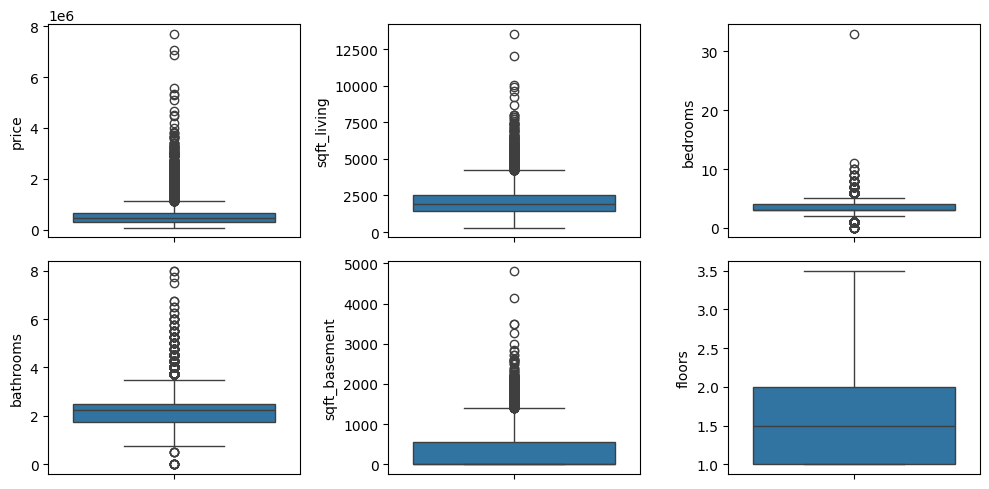

In [31]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['sqft_living'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['sqft_basement'], ax = axs[1,1])
plt3 = sns.boxplot(housing['floors'], ax = axs[1,2])

plt.tight_layout()

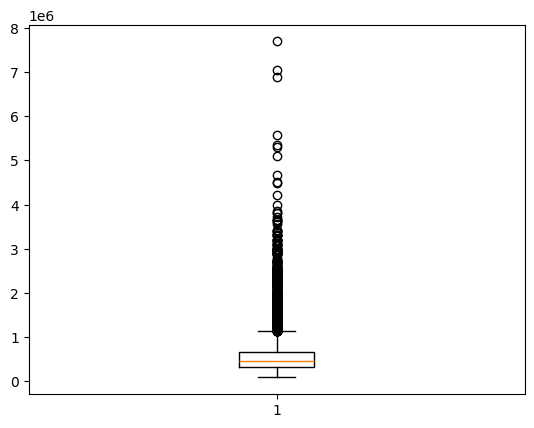

In [32]:
# Outlier Treatment
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

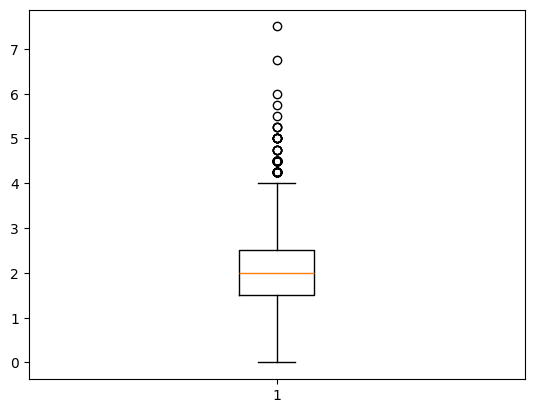

In [33]:
# outlier treatment for bathrooms
plt.boxplot(housing.bathrooms)
Q1 = housing.bathrooms.quantile(0.25)
Q3 = housing.bathrooms.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.bathrooms >= Q1 - 1.5*IQR) & (housing.bathrooms <= Q3 + 1.5*IQR)]

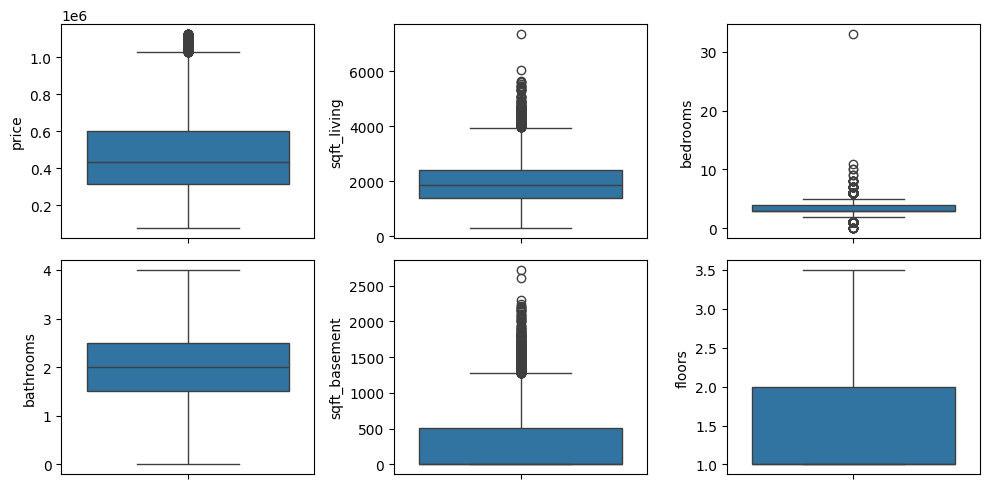

In [34]:
# Outlier Analysis after treatment
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['sqft_living'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['sqft_basement'], ax = axs[1,1])
plt3 = sns.boxplot(housing['floors'], ax = axs[1,2])

plt.tight_layout()

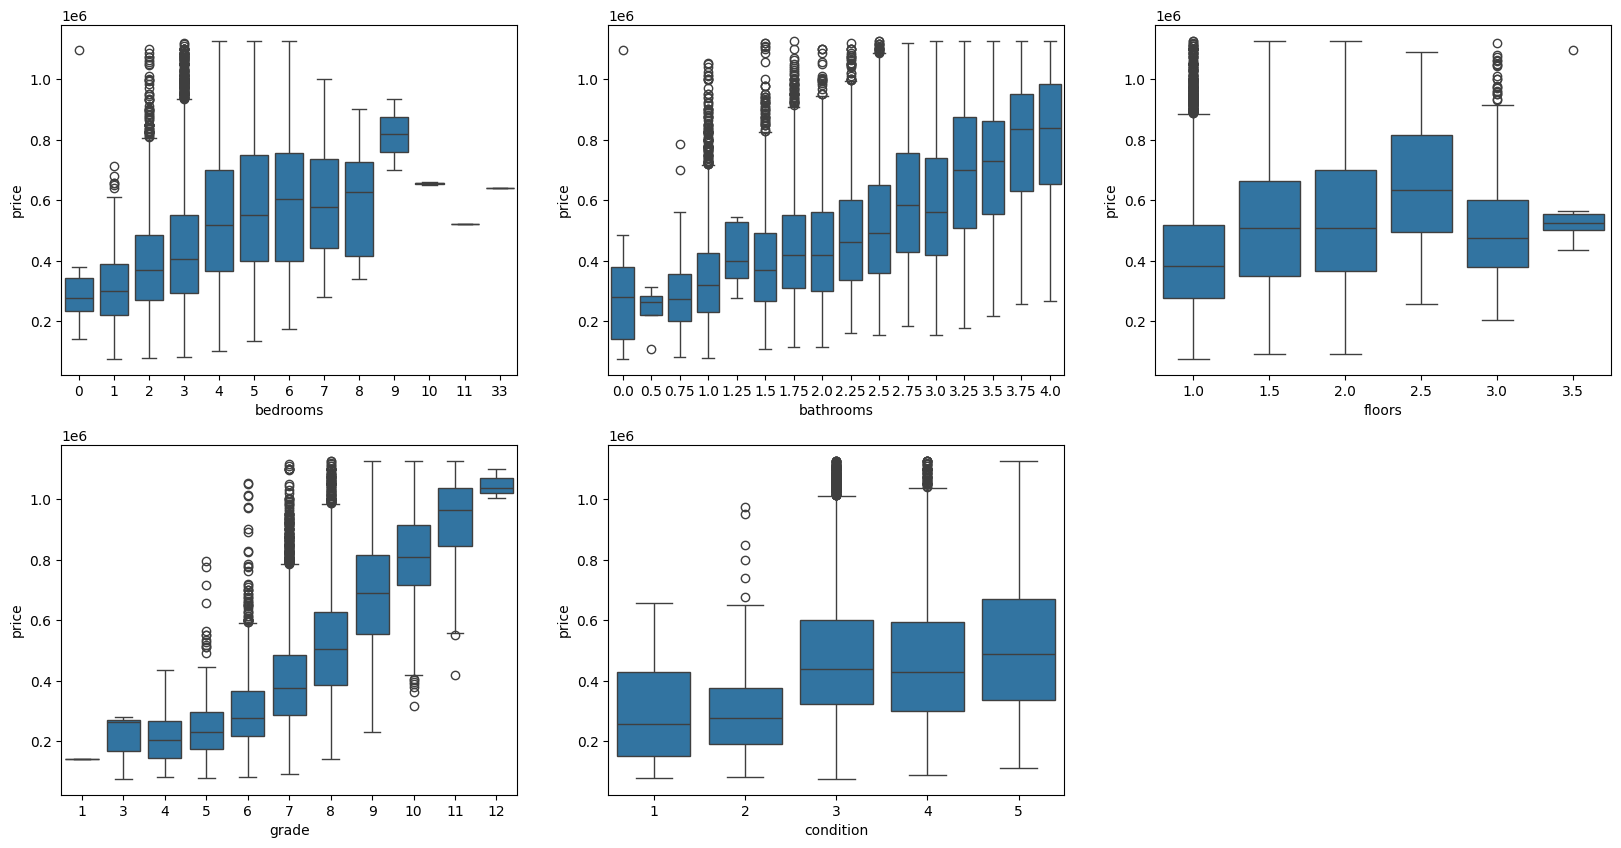

In [35]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'bedrooms', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'bathrooms', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'floors', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'grade', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'condition', y = 'price', data = housing)
plt.show()

<Axes: xlabel='waterfront', ylabel='price'>

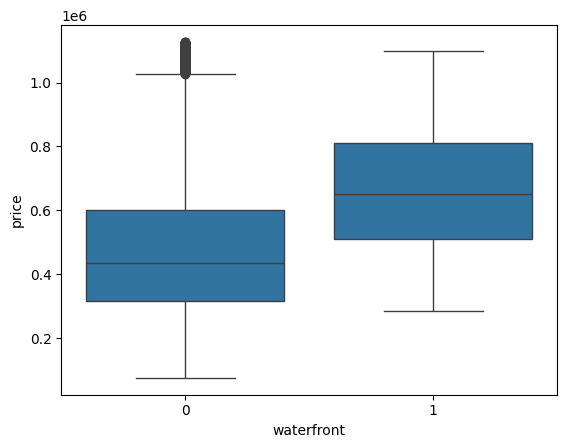

In [36]:
sns.boxplot(x="waterfront", y="price", data=housing)

(0.0, 1180125.0)

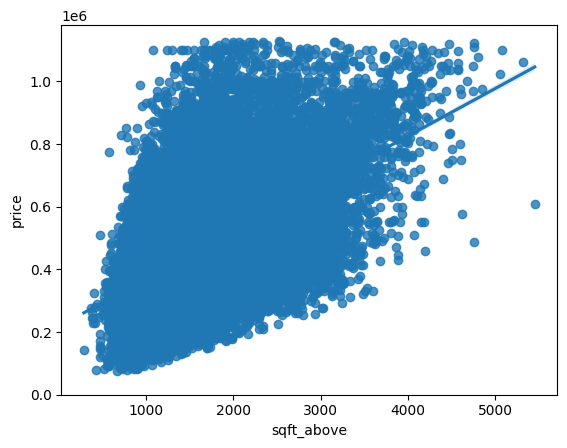

In [37]:
sns.regplot(x="sqft_above", y="price", data=housing)
plt.ylim(0,)

In [38]:
#impoting library to train model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [39]:
#a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2
lm = LinearRegression()
lm

X = housing[['sqft_living']]
Y = housing['price']

lm.fit(X,Y)

lm.score(X,Y)

0.3835958436534721

In [40]:
y_data = housing['price']

x_data=housing.drop('price',axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['sqft_living']], y_train)
lre.score(x_test[['sqft_living']], y_test)

number of test samples : 3055
number of training samples: 17311


0.3897503352355175

In [17]:
# a linear regression model to predict the 'price' using the list of features:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms"]
lm = LinearRegression()
lm

X = housing[['floors']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.07279876727702816

In [18]:
lm = LinearRegression()
lm

X = housing[['waterfront']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.0023528201433631324

In [19]:
lm = LinearRegression()
lm

X = housing[['lat']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.1882804905355394

In [20]:
lm = LinearRegression()
lm

X = housing[['bedrooms']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.08564002841352958

In [21]:
lm = LinearRegression()
lm

X = housing[['sqft_basement']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.05431982250030809

In [22]:
lm = LinearRegression()
lm

X = housing[['view']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.0547511945142406

In [23]:
lm = LinearRegression()
lm

X = housing[['bathrooms']]
Y = housing['price']

lm.fit(X,Y)
lm.score(X,Y)

0.20250034701331432